In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
import os
os.name

if os.name == "plosix":
    sns.set(font = "AppleGothic")

In [3]:
%config InlineBackend.figure_format = 'retina'

# Load Data

In [4]:
%pwd
#%pip install openpyxl

'/Users/yoon_404/Data Analytics/K-Beauty Trend Analysis'

In [5]:
pd.read_excel("K-Beauty_Trend.xlsx")

,지역별,상품군별,판매유형별,항목,단위,2018.1/4,2018.2/4,2018.3/4,2018.4/4,2019.1/4,...,2023.2/4,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,합계,합계,계,해외직접판매액[백만원],백만원,833672,897205,921586,974060,1251122,...,453625.0,"2.4/4""",2023.1/4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,합계,합계,면세점,해외직접판매액[백만원],백만원,665613,725319,761836,770656,1070693,...,281235.0,NaN,"2.4/4""",2023.1/4,NaN,NaN,NaN,NaN,NaN,NaN
2,합계,합계,면세점 이외,해외직접판매액[백만원],백만원,168059,171886,159750,203404,180429,...,172390.0,"235""",NaN,"2.4/4""",2023.1/4,NaN,NaN,NaN,NaN,NaN
3,합계,컴퓨터 및 주변기기,계,해외직접판매액[백만원],백만원,5236,3854,4320,4511,3702,...,2547.0,"352""",203508,200927,NaN,NaN,NaN,NaN,NaN,NaN
4,합계,컴퓨터 및 주변기기,면세점,해외직접판매액[백만원],백만원,2,6,1,215,2,...,0.0,3612,2707,2449,2867,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,기타,생활·자동차용품,면세점,해외직접판매액[백만원],백만원,0,0,0,0,0,...,NaN,",1081""",268,168,83,NaN,NaN,NaN,NaN,NaN
965,기타,생활·자동차용품,면세점 이외,해외직접판매액[백만원],백만원,665,469,504,589,465,...,NaN,NaN,NaN,626,NaN,NaN,NaN,",,"",",NaN,NaN
966,기타,기 타,계,해외직접판매액[백만원],백만원,1067,1063,1120,770,711,...,NaN,NaN,NaN,NaN,626,NaN,NaN,NaN,NaN,NaN
967,기타,기 타,면세점,해외직접판매액[백만원],백만원,272,316,404,0,0,...,NaN,",1076""",2325,725,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_raw = pd.read_excel("K-Beauty_Trend.xlsx")
df_raw.shape

(969, 36)

# Data Preprocessing

In [7]:
df_raw["지역별"].value_counts()

지역별
합계         51
유럽         51
아프리카       51
중남미        51
대양주        51
기타 유럽      51
영국         51
유럽연합       51
유럽연합+영국    51
캐나다        51
아시아        51
미국         51
북미         51
기타 아시아     51
중동         51
아세안        51
일본         51
중국         51
기타         51
Name: count, dtype: int64

In [8]:
df_raw.columns

Index(['지역별', '상품군별', '판매유형별', '항목', '단위', '2018.1/4', '2018.2/4', '2018.3/4',
       '2018.4/4', '2019.1/4', '2019.2/4', '2019.3/4', '2019.4/4', '2020.1/4',
       '2020.2/4', '2020.3/4', '2020.4/4', '2021.1/4', '2021.2/4', '2021.3/4',
       '2021.4/4', '2022.1/4', '2022.2/4', '2022.3/4', '2022.4/4', '2023.1/4',
       '2023.2/4', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35'],
      dtype='object')

In [9]:
df_raw = df_raw.drop(['항목', '단위','Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35'], axis = 1)

In [10]:
# 날짜와 판매수치를 일대일대응으로 하는 새로운 표를 만듬
df = df_raw.melt(id_vars = ["지역별", "상품군별", "판매유형별"], var_name = "기간", value_name = "백만원")

In [11]:
df.shape

(21318, 5)

In [12]:
df.head()

,지역별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2018.1/4,833672
1,합계,합계,면세점,2018.1/4,665613
2,합계,합계,면세점 이외,2018.1/4,168059
3,합계,컴퓨터 및 주변기기,계,2018.1/4,5236
4,합계,컴퓨터 및 주변기기,면세점,2018.1/4,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21318 entries, 0 to 21317
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역별     21318 non-null  object
 1   상품군별    21318 non-null  object
 2   판매유형별   21318 non-null  object
 3   기간      21318 non-null  object
 4   백만원     21216 non-null  object
dtypes: object(5)
memory usage: 832.9+ KB


In [14]:
df["기간"]

0        2018.1/4
1        2018.1/4
2        2018.1/4
3        2018.1/4
4        2018.1/4
           ...   
21313    2023.2/4
21314    2023.2/4
21315    2023.2/4
21316    2023.2/4
21317    2023.2/4
Name: 기간, Length: 21318, dtype: object

In [15]:
# 기간에서 년도만 분리하기

int("2018.1/4".split('.')[0])

2018

In [16]:
df["연도"] = df["기간"].map(lambda x : int(x.split('.')[0]))
df.head()

,지역별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2018.1/4,833672,2018
1,합계,합계,면세점,2018.1/4,665613,2018
2,합계,합계,면세점 이외,2018.1/4,168059,2018
3,합계,컴퓨터 및 주변기기,계,2018.1/4,5236,2018
4,합계,컴퓨터 및 주변기기,면세점,2018.1/4,2,2018


In [17]:
# 분기 컬럼 만들기

"2018.1/4".split('.')[1].split('/')[0]

'1'

In [18]:
df["분기"] = df["기간"].map(lambda x : int(x.split('.')[1].split('/')[0]))
df.head()

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2018.1/4,833672,2018,1
1,합계,합계,면세점,2018.1/4,665613,2018,1
2,합계,합계,면세점 이외,2018.1/4,168059,2018,1
3,합계,컴퓨터 및 주변기기,계,2018.1/4,5236,2018,1
4,합계,컴퓨터 및 주변기기,면세점,2018.1/4,2,2018,1


In [19]:
df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)
df.head()

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2018.1/4,833672.0,2018,1
1,합계,합계,면세점,2018.1/4,665613.0,2018,1
2,합계,합계,면세점 이외,2018.1/4,168059.0,2018,1
3,합계,컴퓨터 및 주변기기,계,2018.1/4,5236.0,2018,1
4,합계,컴퓨터 및 주변기기,면세점,2018.1/4,2.0,2018,1


In [20]:
df

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2018.1/4,833672.0,2018,1
1,합계,합계,면세점,2018.1/4,665613.0,2018,1
2,합계,합계,면세점 이외,2018.1/4,168059.0,2018,1
3,합계,컴퓨터 및 주변기기,계,2018.1/4,5236.0,2018,1
4,합계,컴퓨터 및 주변기기,면세점,2018.1/4,2.0,2018,1
...,...,...,...,...,...,...,...
21313,기타,생활·자동차용품,면세점,2023.2/4,NaN,2023,2
21314,기타,생활·자동차용품,면세점 이외,2023.2/4,NaN,2023,2
21315,기타,기 타,계,2023.2/4,NaN,2023,2
21316,기타,기 타,면세점,2023.2/4,NaN,2023,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21318 entries, 0 to 21317
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역별     21318 non-null  object 
 1   상품군별    21318 non-null  object 
 2   판매유형별   21318 non-null  object 
 3   기간      21318 non-null  object 
 4   백만원     10836 non-null  float64
 5   연도      21318 non-null  int64  
 6   분기      21318 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ MB


In [22]:
# 필요없는 데이터 제거

df =  df[(df["지역별"] != "합계") & (df["상품군별"] != "합계")].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19008 entries, 54 to 21317
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역별     19008 non-null  object 
 1   상품군별    19008 non-null  object 
 2   판매유형별   19008 non-null  object 
 3   기간      19008 non-null  object 
 4   백만원     9192 non-null   float64
 5   연도      19008 non-null  int64  
 6   분기      19008 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ MB


In [23]:
# 결측치 확인하기 -> 금액이 없는 데이터도 존재함

df.isnull().sum()

지역별         0
상품군별        0
판매유형별       0
기간          0
백만원      9816
연도          0
분기          0
dtype: int64

In [24]:
df_total = df[df["판매유형별"] == "계"].copy()
df_total = df_total.dropna()

# Data Visualization

In [25]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='연도', ylabel='백만원'>

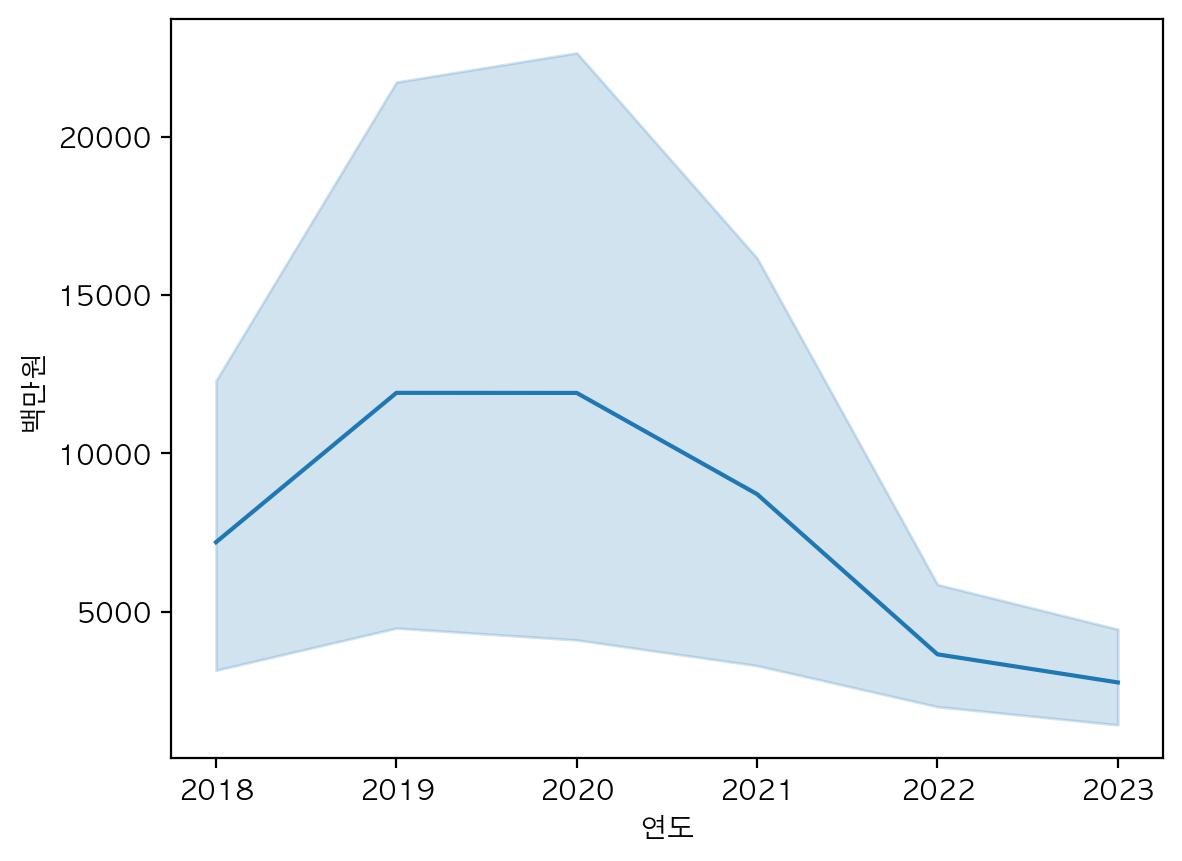

In [26]:
sns.lineplot(data = df_total, x = "연도", y = "백만원")

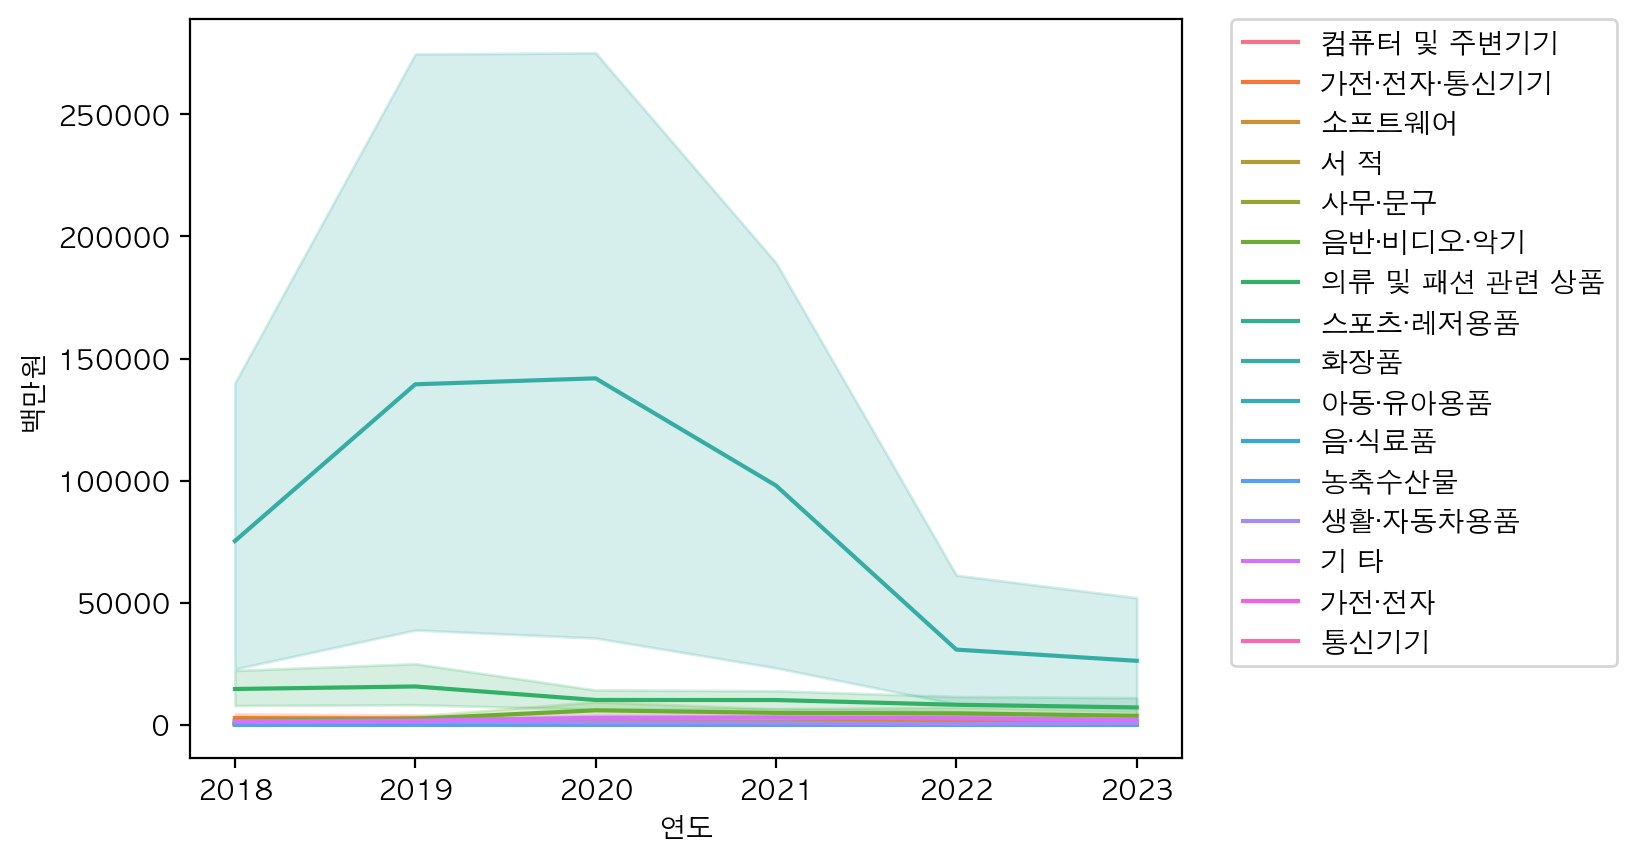

In [27]:
sns.lineplot(data = df_total,  x = "연도", y = "백만원", hue = "상품군별")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

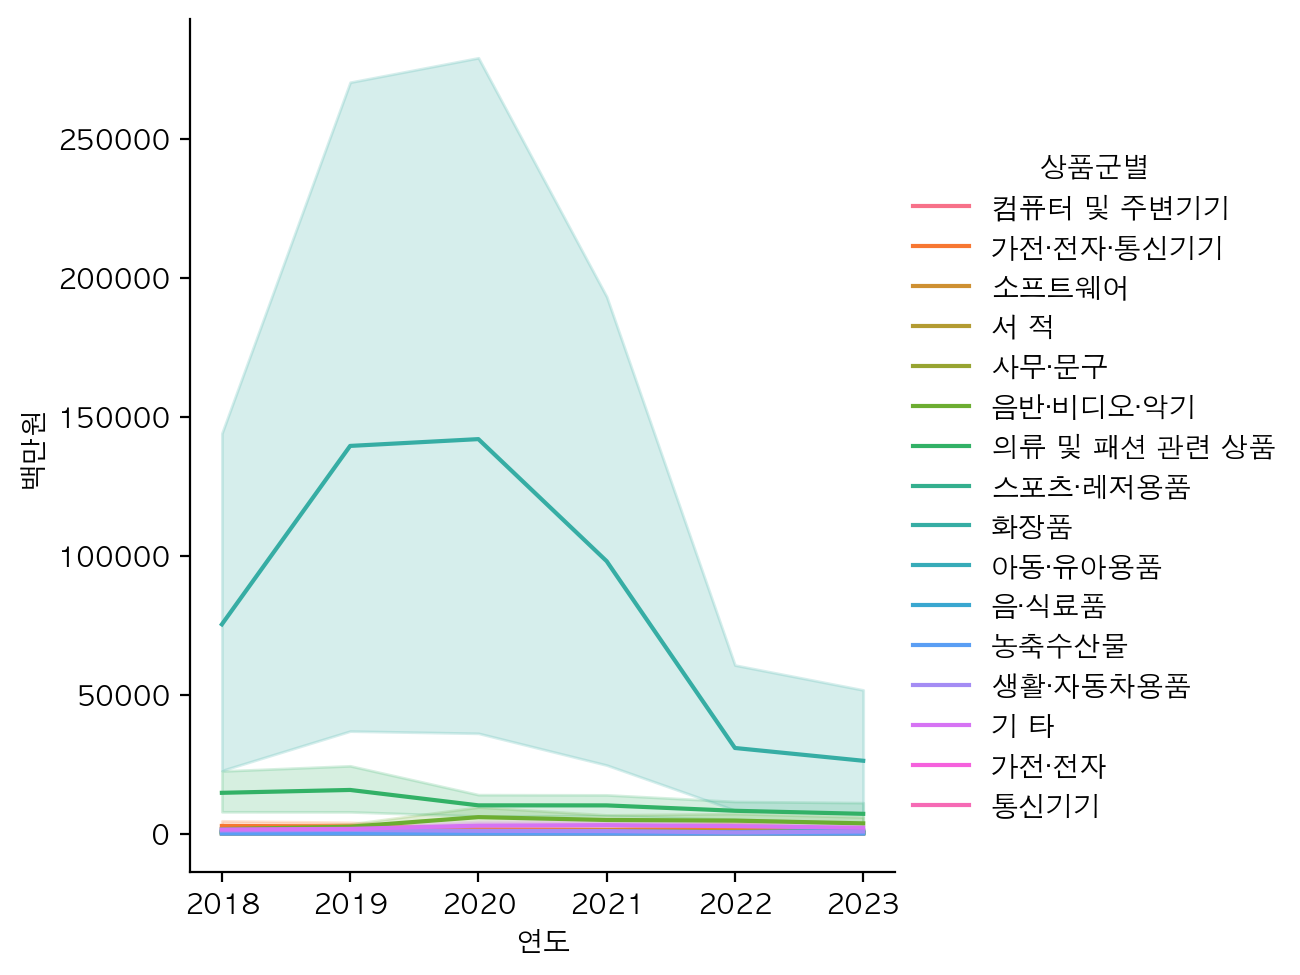

In [28]:
sns.relplot(data = df_total,  x = "연도", y = "백만원", hue = "상품군별", kind = "line")

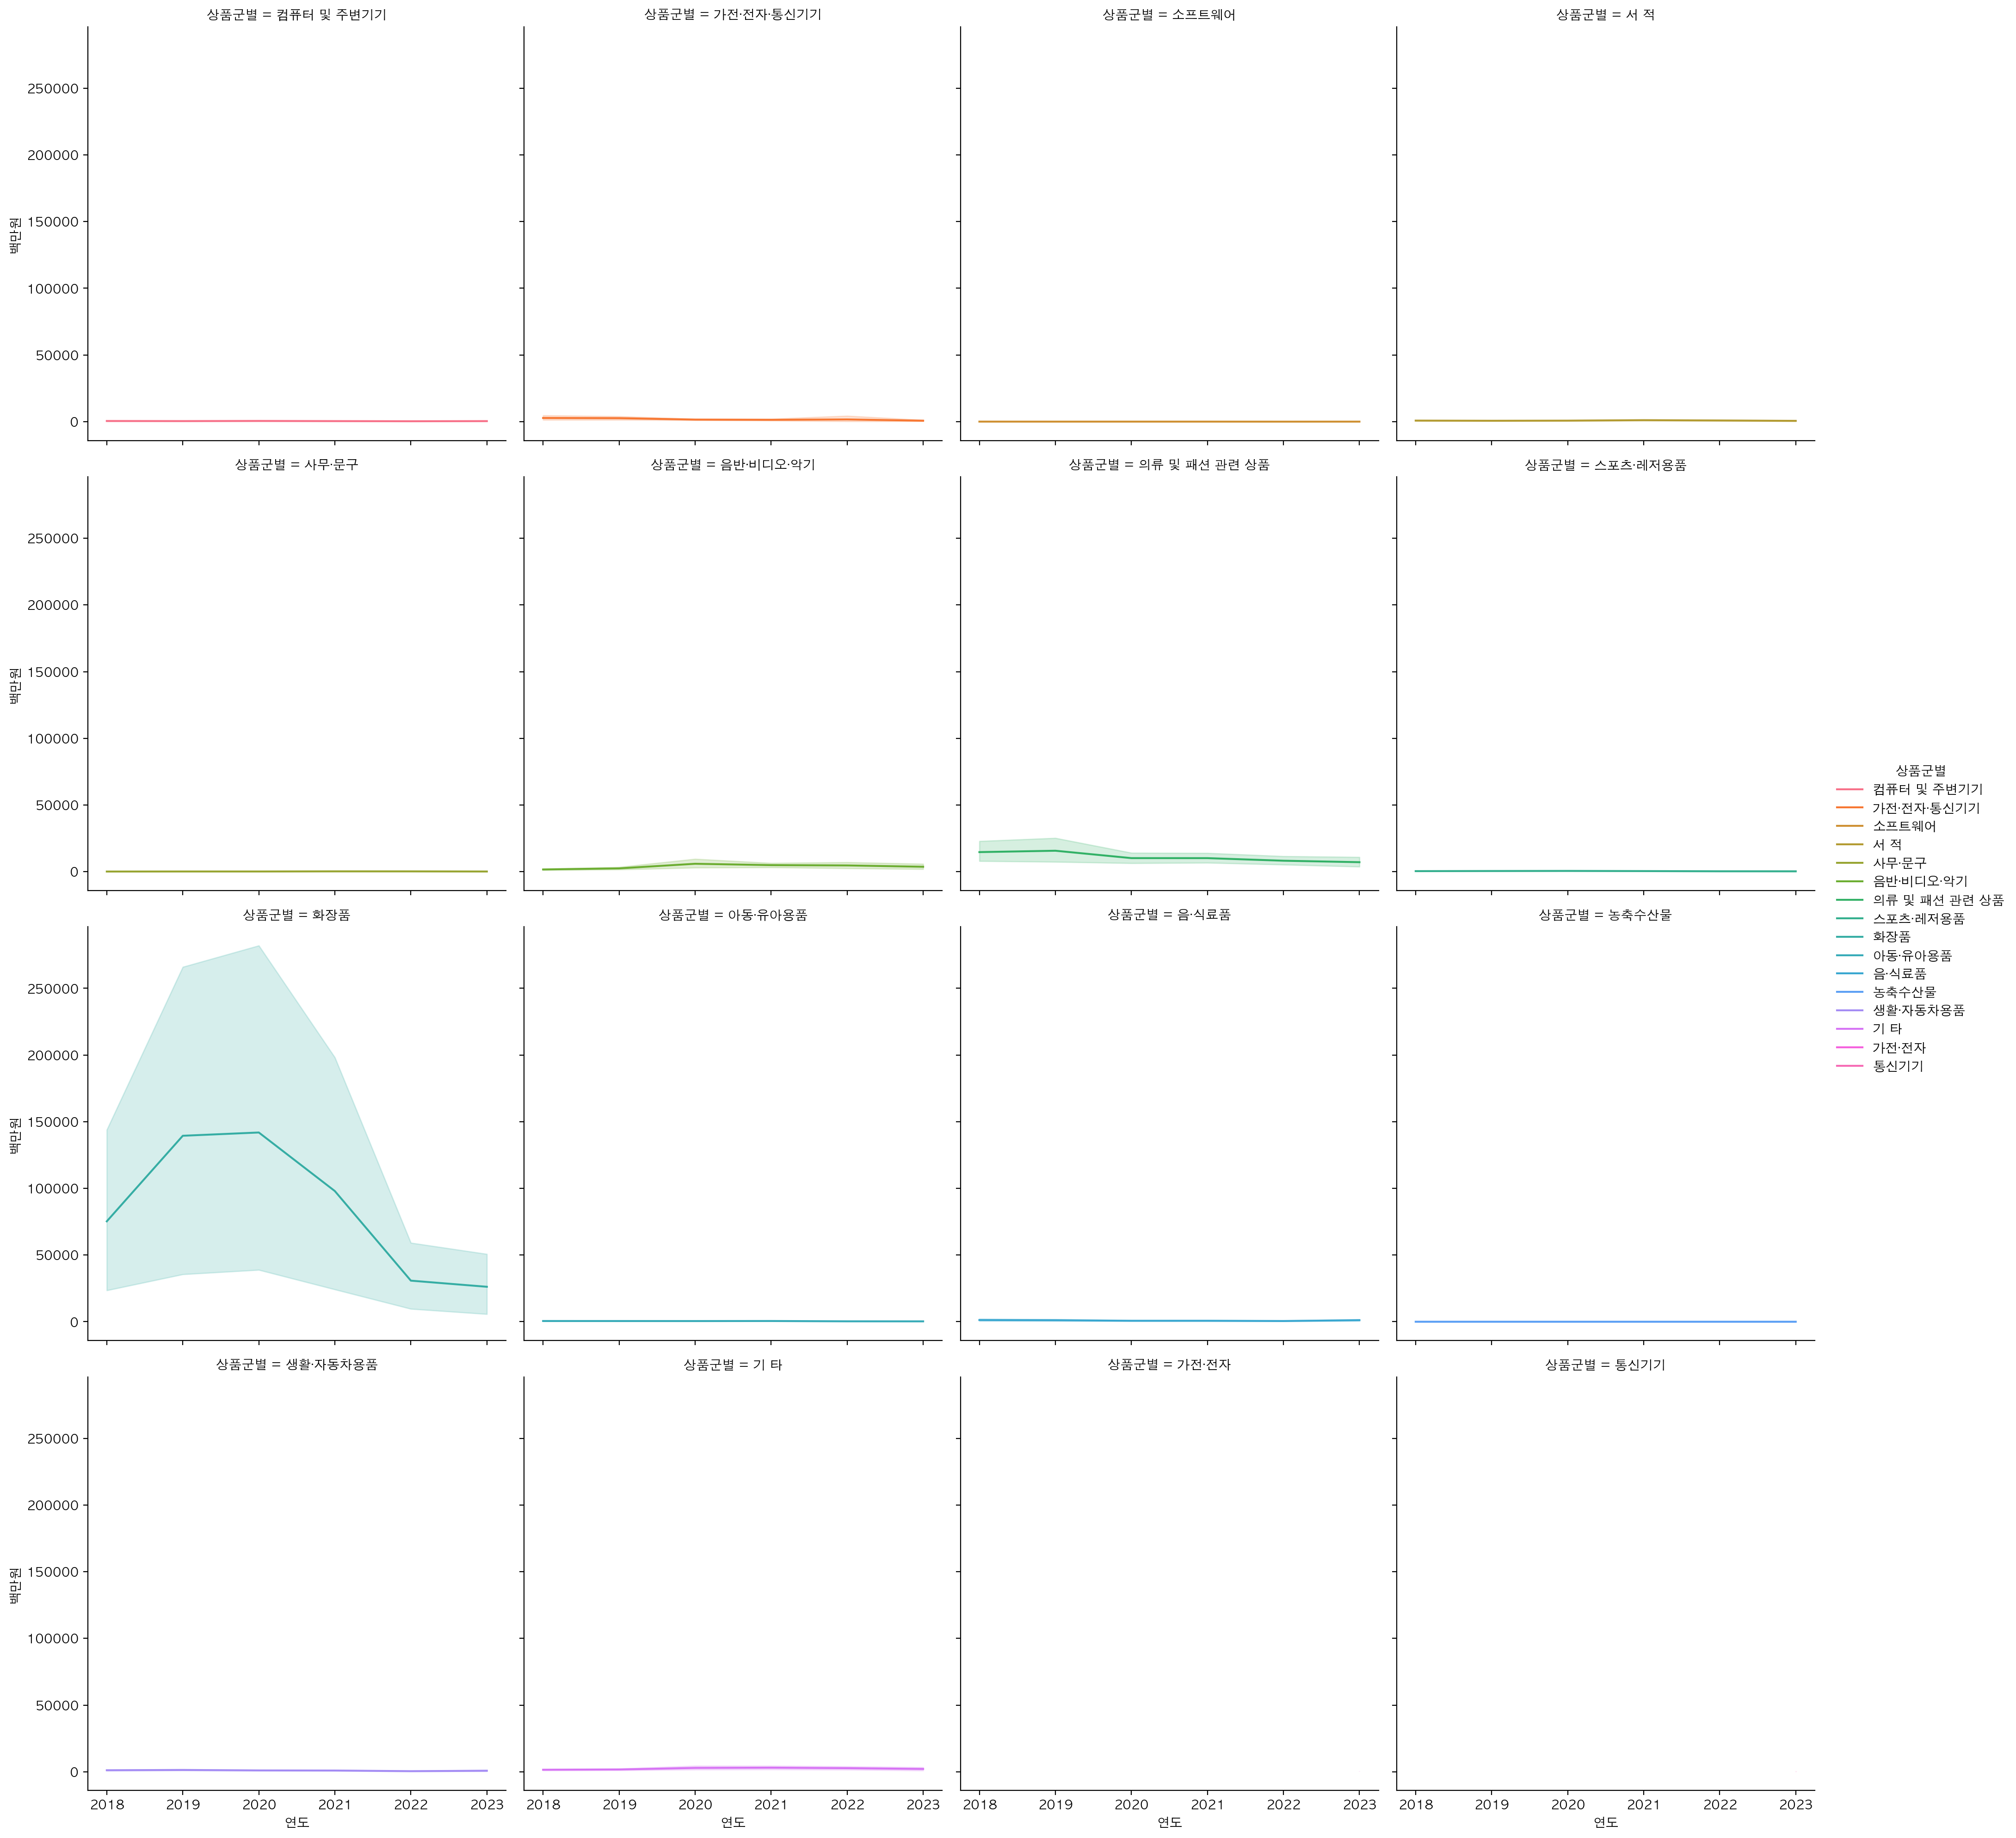

In [29]:
sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line", col="상품군별", col_wrap=4)

In [30]:
df_sub = df_total[~df_total["상품군별"].isin(["화장품"])].copy()
df_sub

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
105,중국,컴퓨터 및 주변기기,계,2018.1/4,34.0,2018,1
108,중국,가전·전자·통신기기,계,2018.1/4,15671.0,2018,1
117,중국,소프트웨어,계,2018.1/4,4.0,2018,1
120,중국,서 적,계,2018.1/4,1272.0,2018,1
123,중국,사무·문구,계,2018.1/4,60.0,2018,1
...,...,...,...,...,...,...,...
21252,아프리카,아동·유아용품,계,2023.2/4,0.0,2023,2
21255,아프리카,음·식료품,계,2023.2/4,0.0,2023,2
21258,아프리카,농축수산물,계,2023.2/4,0.0,2023,2
21261,아프리카,생활·자동차용품,계,2023.2/4,0.0,2023,2


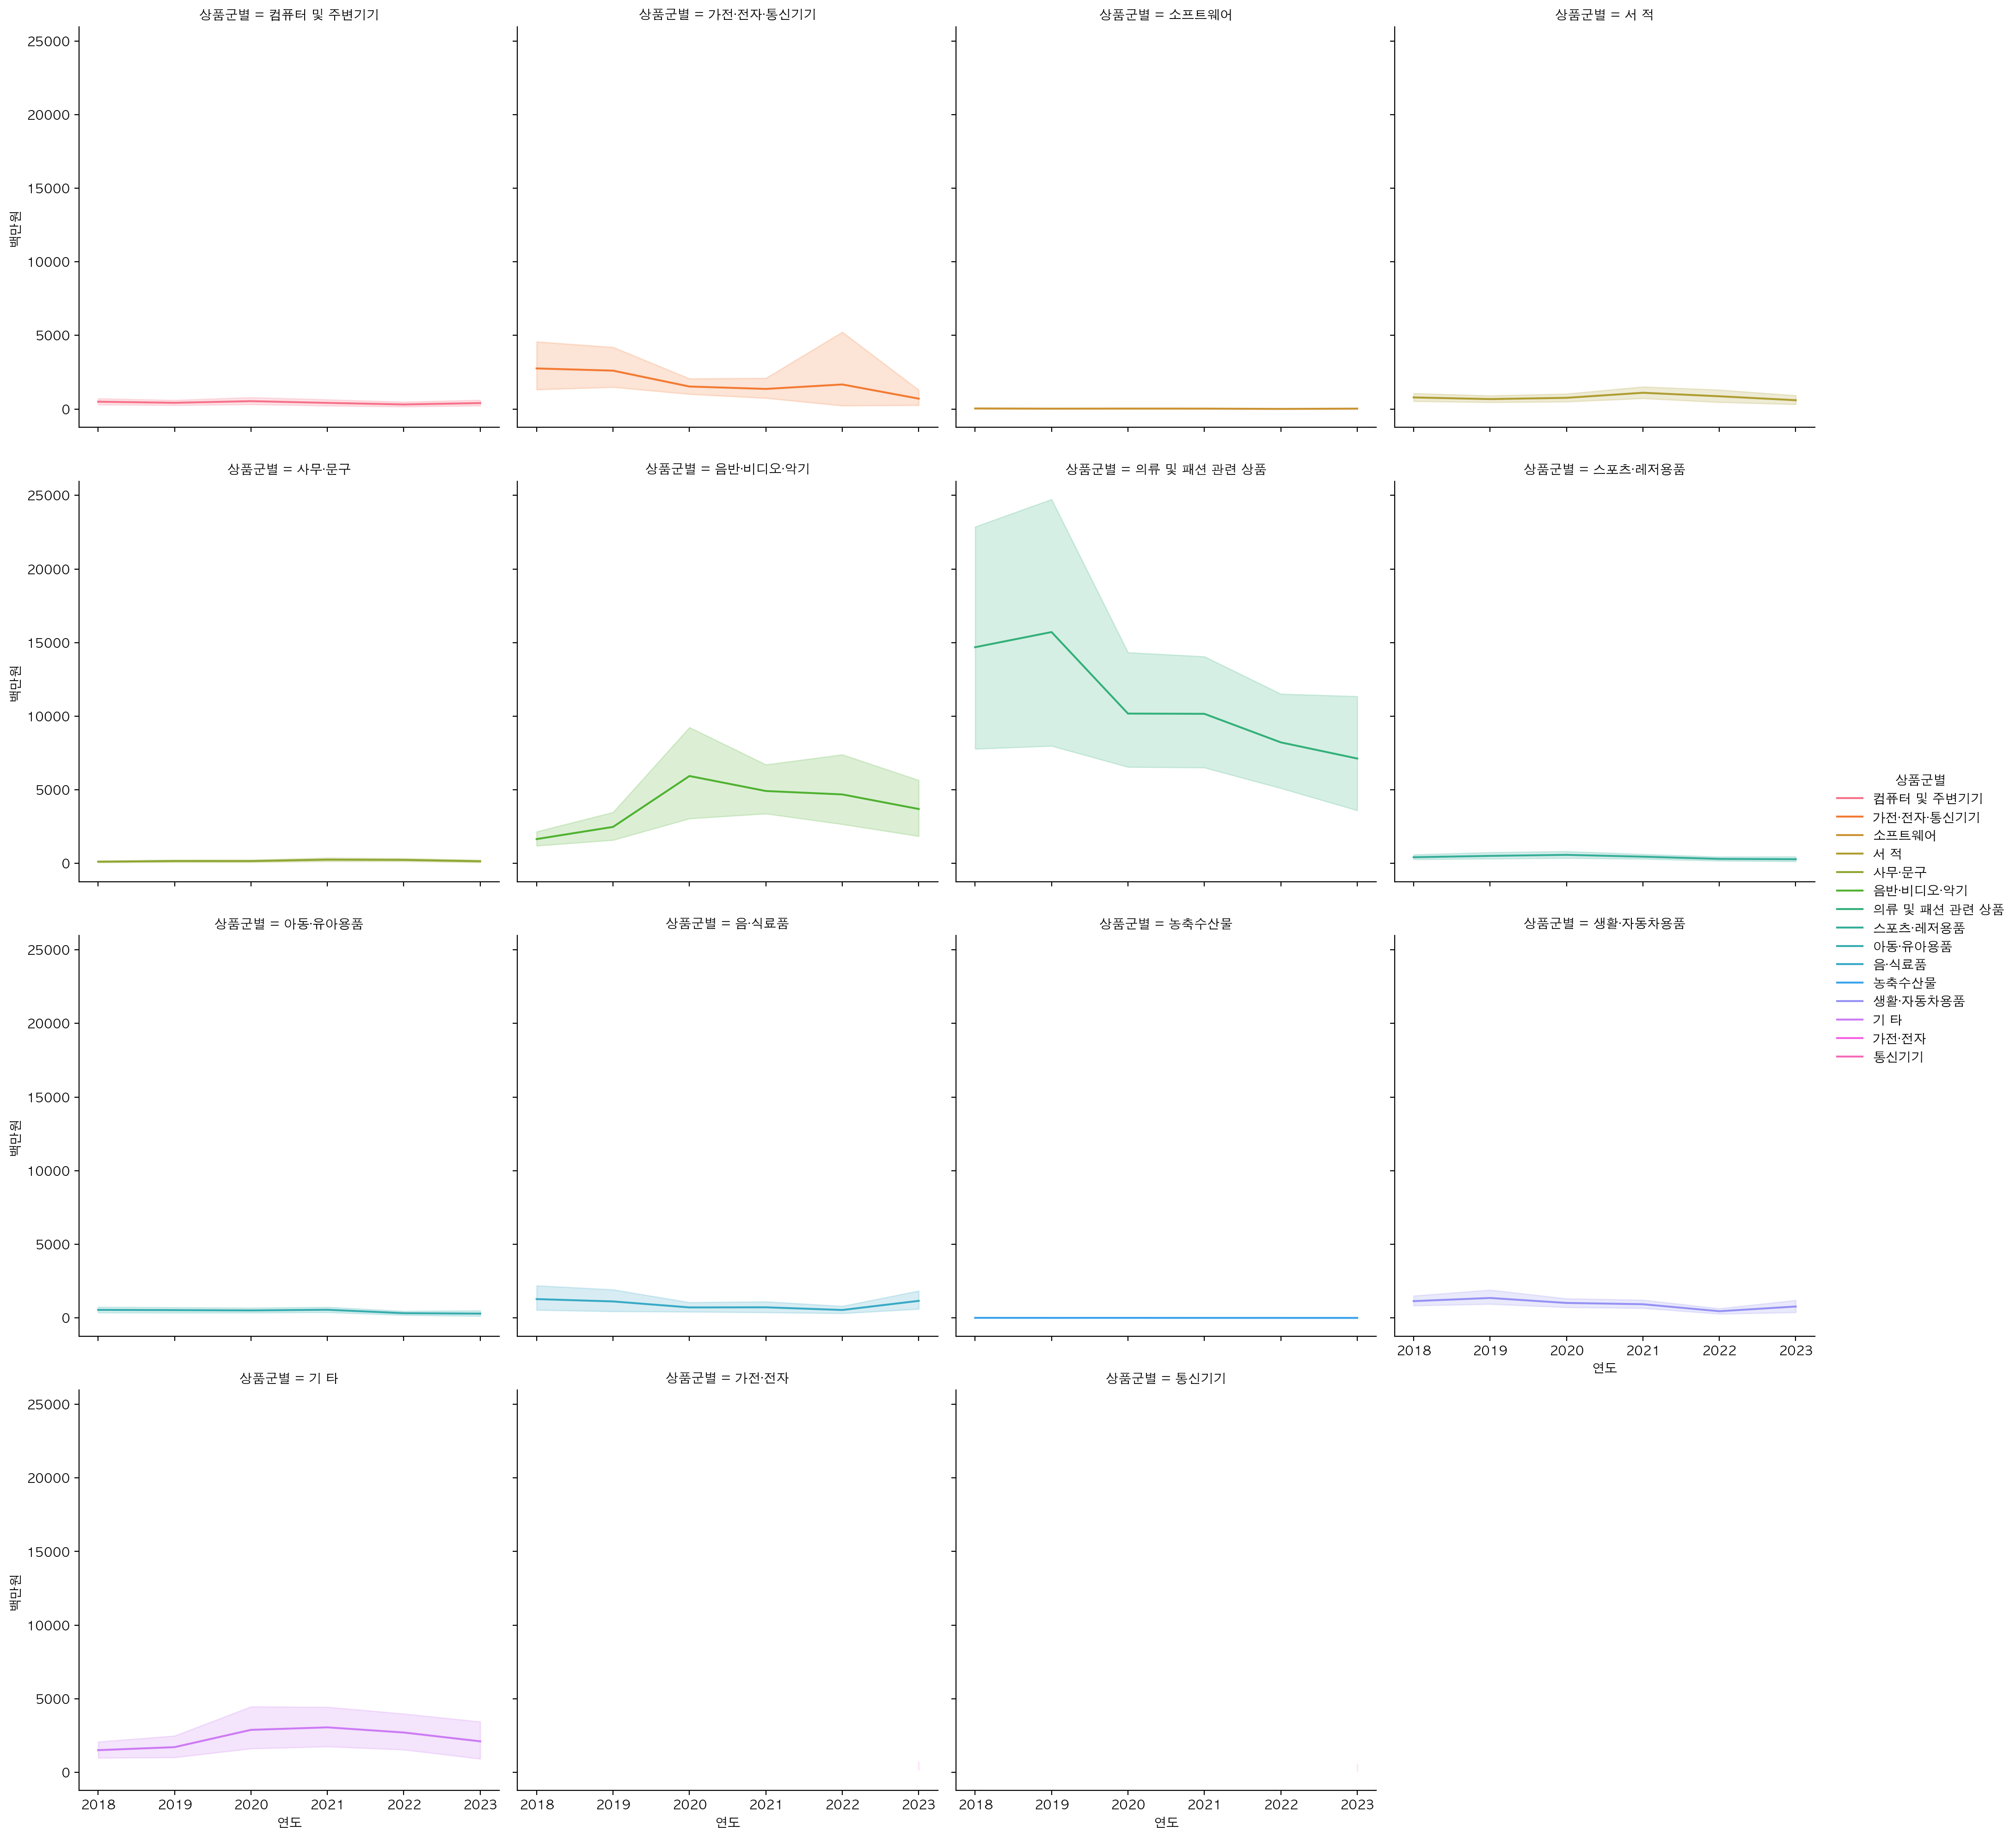

In [31]:
sns.relplot(data=df_sub, x="연도", y="백만원", hue="상품군별", col="상품군별", col_wrap=4, kind="line")

## Coemetic Daten Visualisieren

In [32]:
df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
135,중국,화장품,계,2018.1/4,536503.0,2018,1
186,일본,화장품,계,2018.1/4,4425.0,2018,1
237,아세안,화장품,계,2018.1/4,23341.0,2018,1
288,중동,화장품,계,2018.1/4,659.0,2018,1
441,미국,화장품,계,2018.1/4,13909.0,2018,1
...,...,...,...,...,...,...,...
21045,영국,화장품,계,2023.2/4,73.0,2023,2
21096,기타 유럽,화장품,계,2023.2/4,283.0,2023,2
21147,대양주,화장품,계,2023.2/4,36.0,2023,2
21198,중남미,화장품,계,2023.2/4,27.0,2023,2


<Axes: xlabel='기간', ylabel='백만원'>

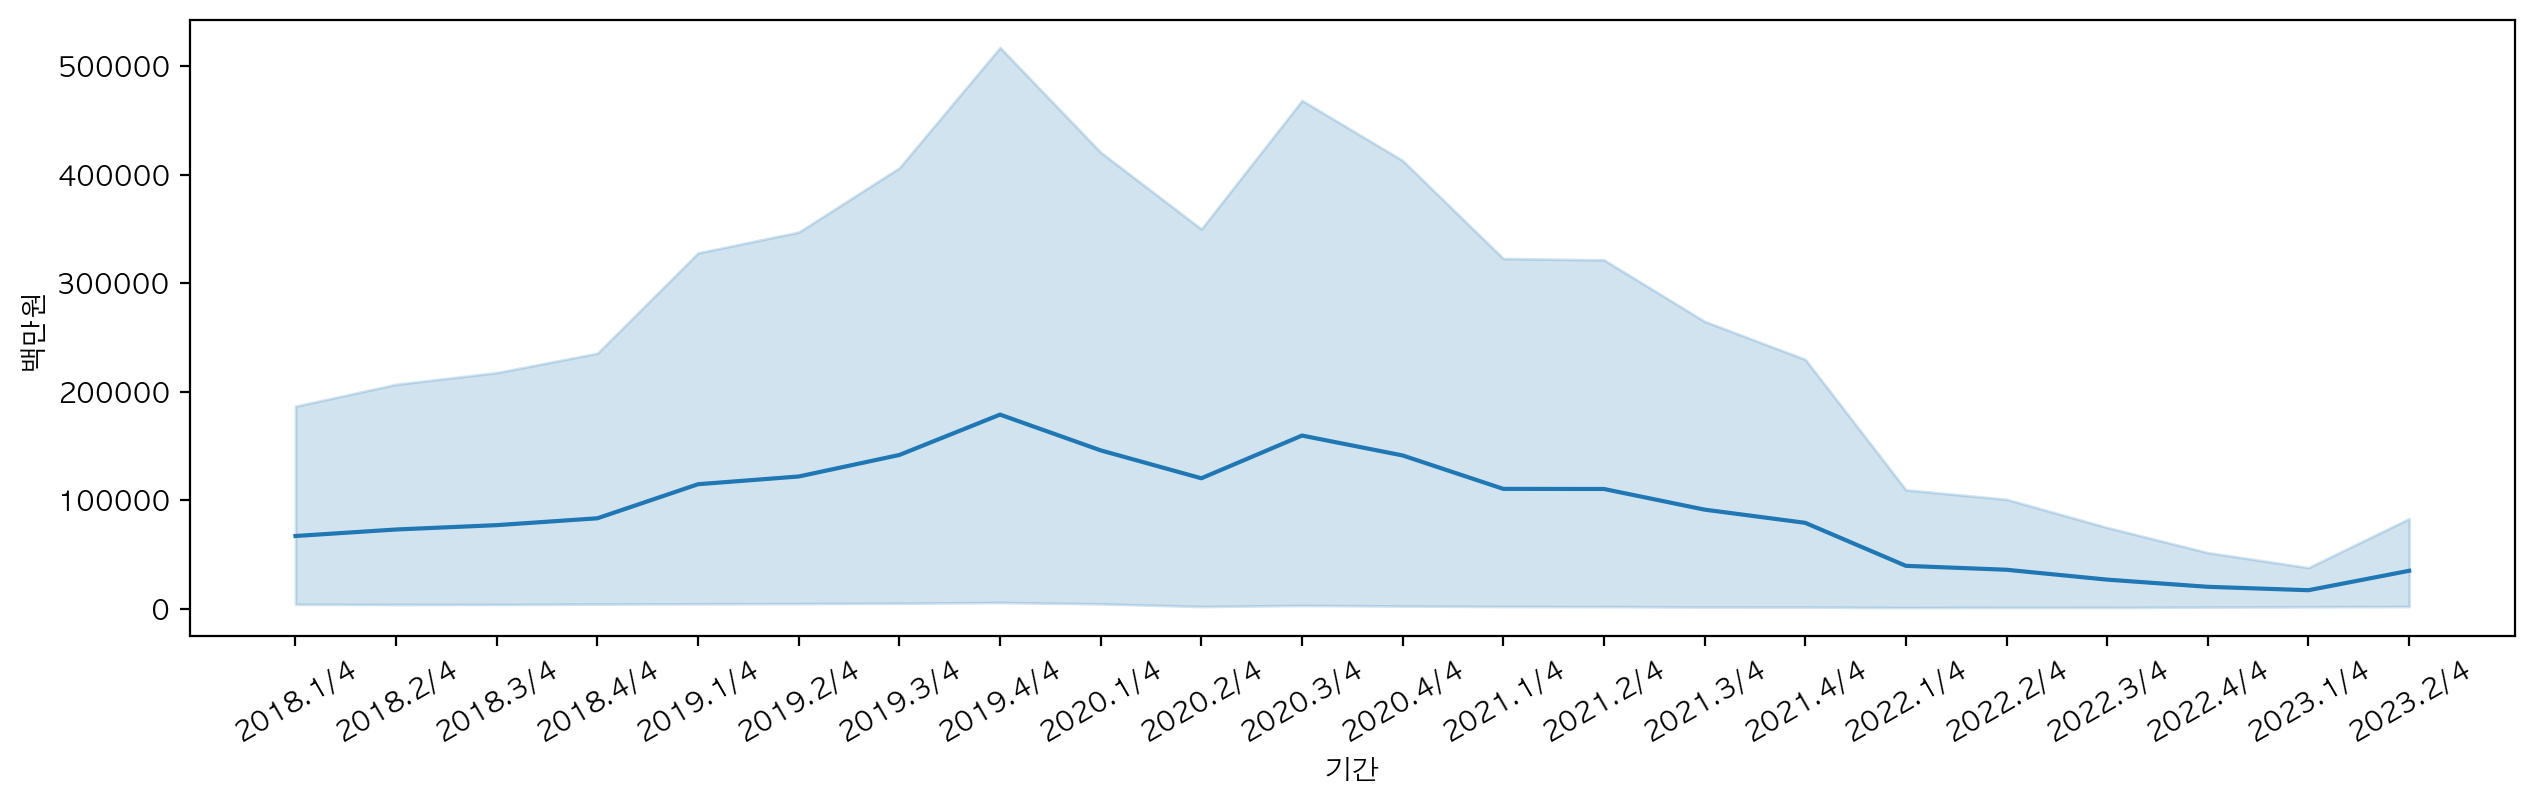

In [35]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_cosmetic, x = "기간", y = "백만원")

In [36]:
df_cosmetic.head()

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
135,중국,화장품,계,2018.1/4,536503.0,2018,1
186,일본,화장품,계,2018.1/4,4425.0,2018,1
237,아세안,화장품,계,2018.1/4,23341.0,2018,1
288,중동,화장품,계,2018.1/4,659.0,2018,1
441,미국,화장품,계,2018.1/4,13909.0,2018,1


<Axes: xlabel='기간', ylabel='백만원'>

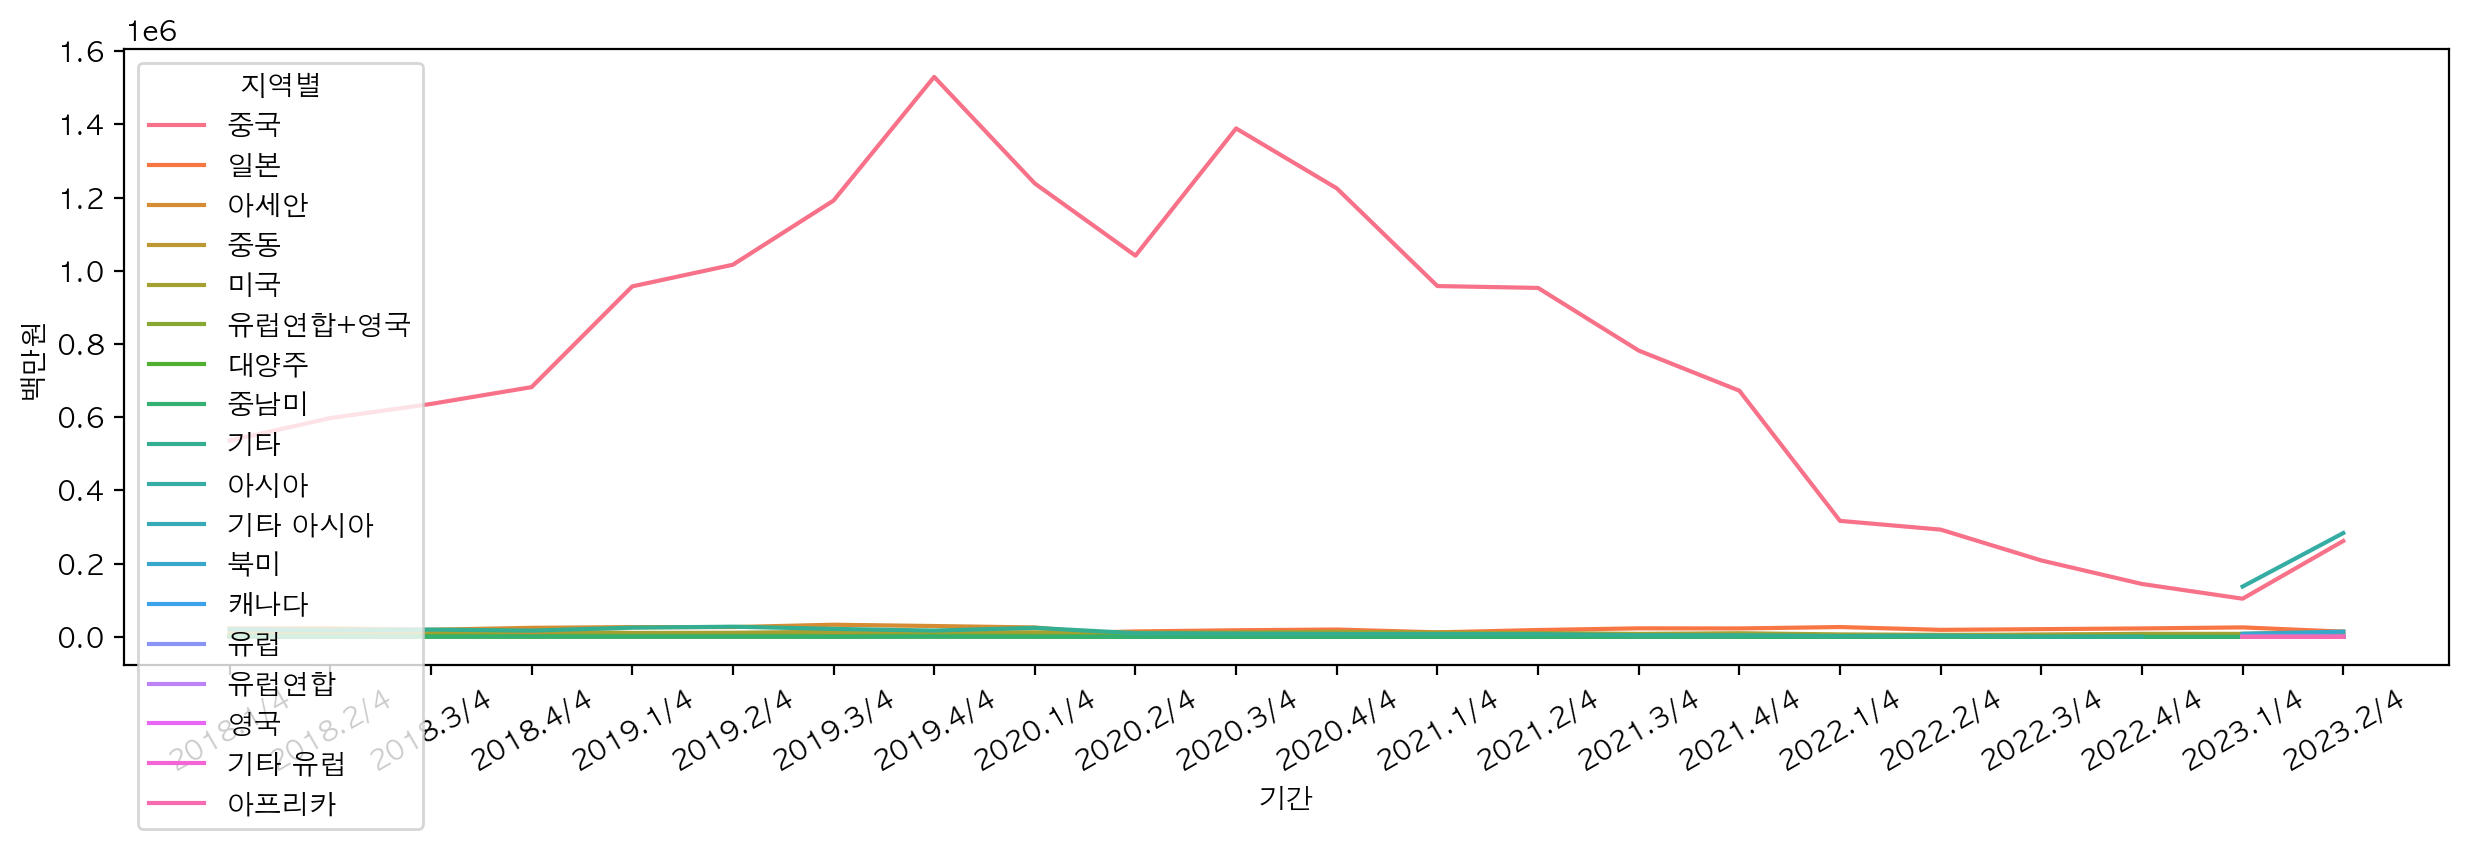

In [40]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="지역별")

<Axes: xlabel='기간', ylabel='백만원'>

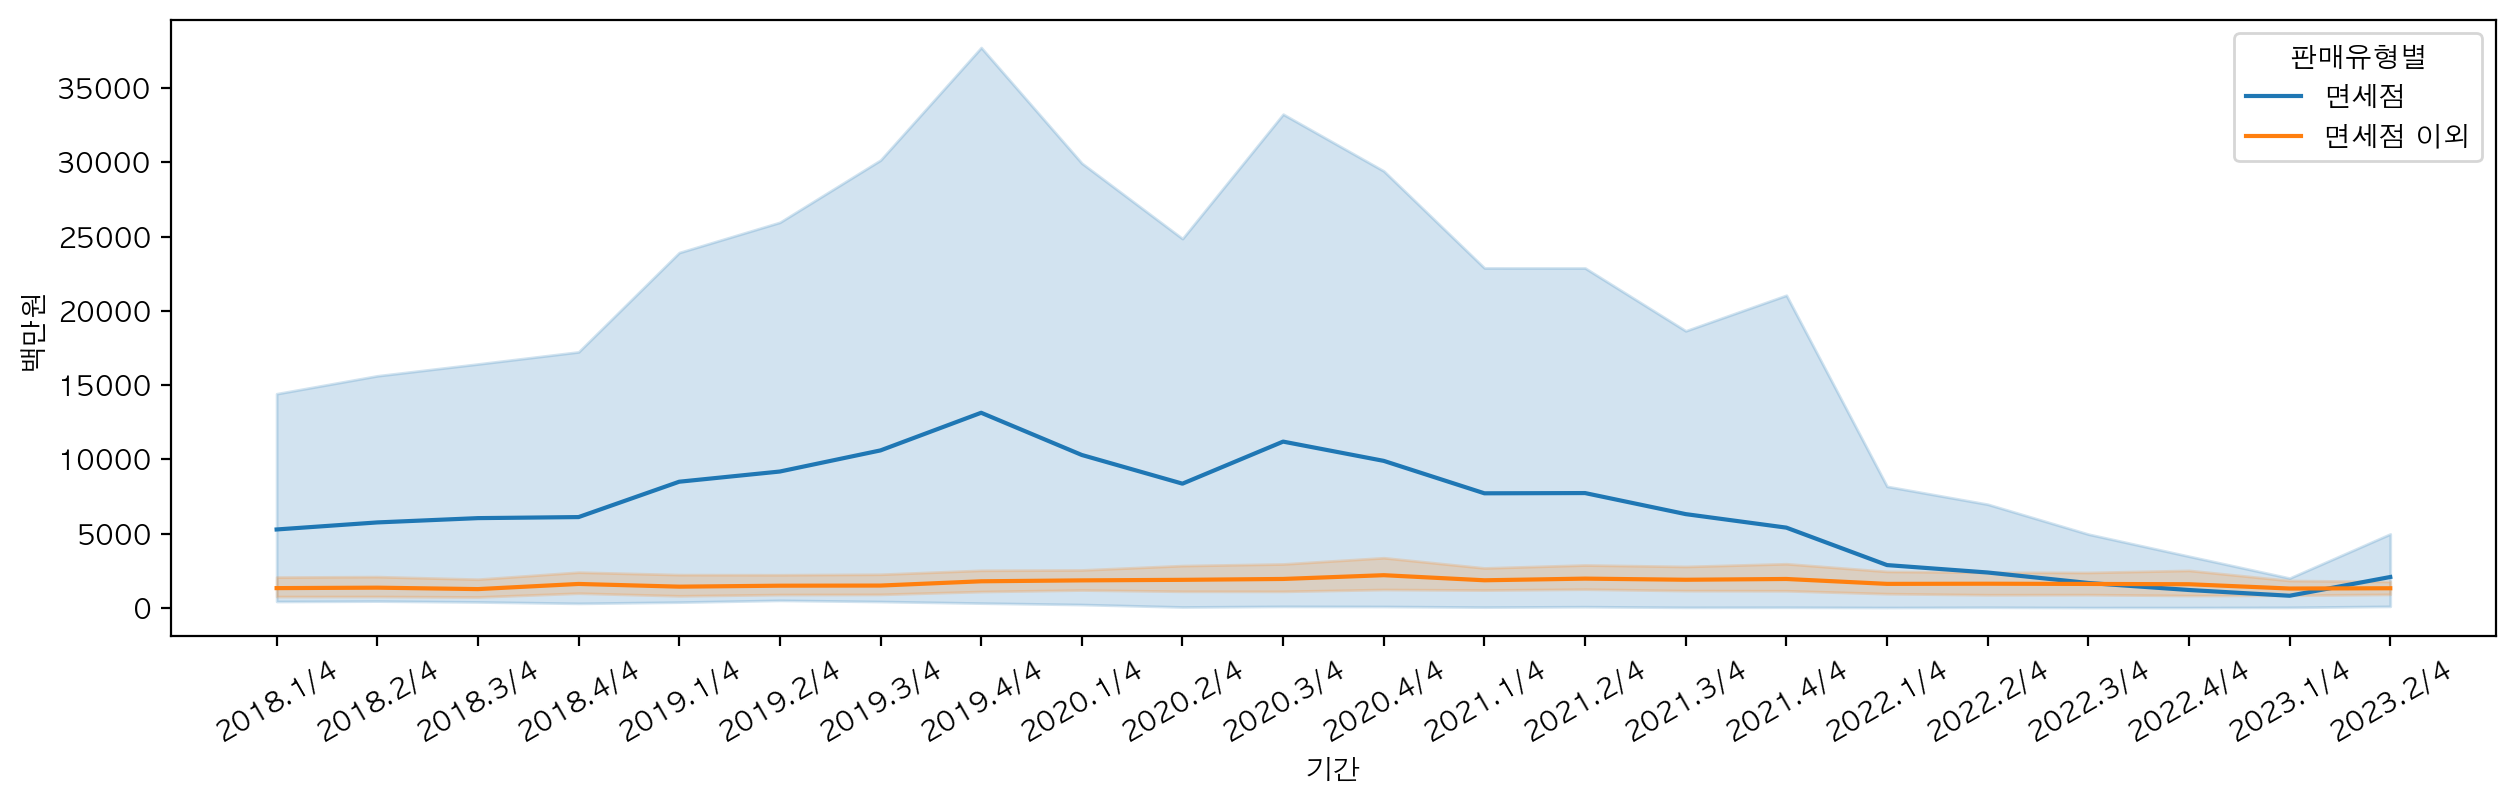

In [39]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub = df[df["판매유형별"] != "계"].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별")

<Axes: xlabel='기간', ylabel='백만원'>

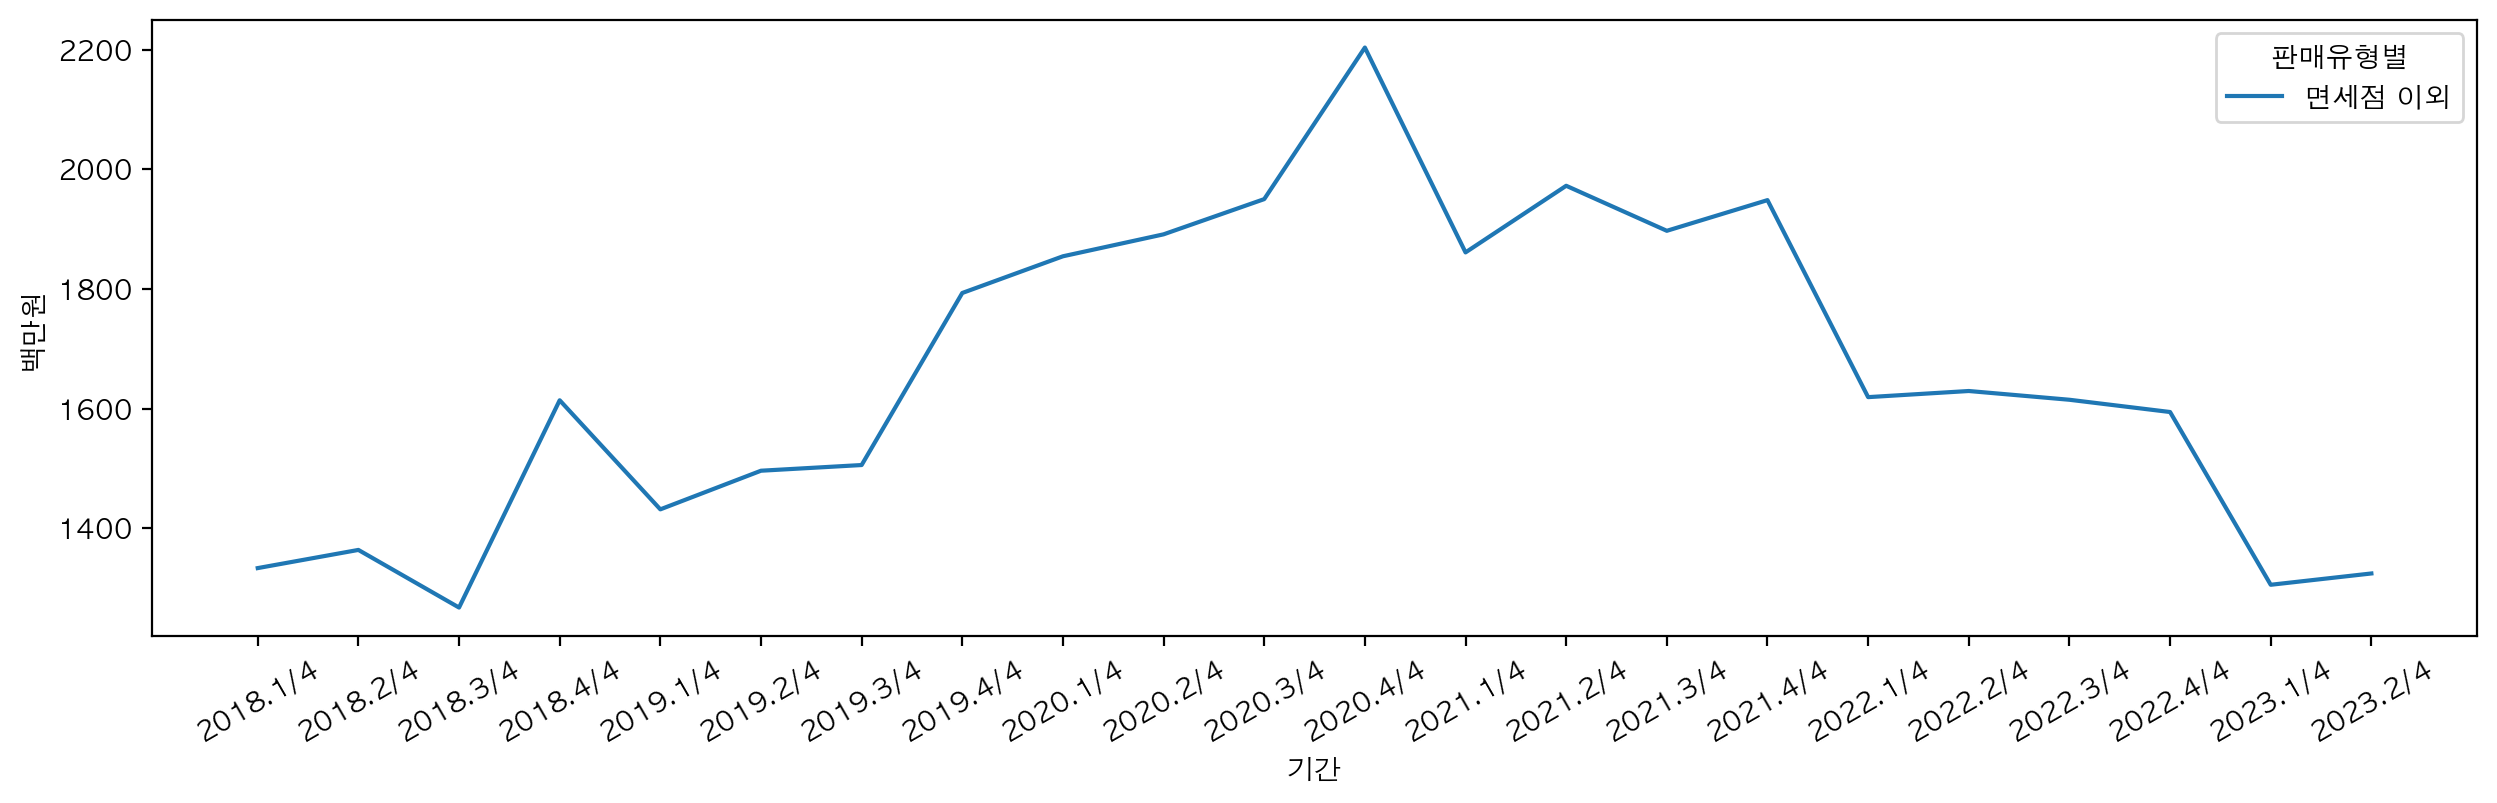

In [41]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별", ci=None)

## Fashion Data Analysieren

In [52]:
df_fashion = df[df["상품군별"] == "의류 및 패션 관련 상품"].copy()
df_fashion.head()

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
78,아시아,의류 및 패션 관련 상품,계,2018.1/4,NaN,2018,1
79,아시아,의류 및 패션 관련 상품,면세점,2018.1/4,NaN,2018,1
80,아시아,의류 및 패션 관련 상품,면세점 이외,2018.1/4,NaN,2018,1
129,중국,의류 및 패션 관련 상품,계,2018.1/4,74535.0,2018,1
130,중국,의류 및 패션 관련 상품,면세점,2018.1/4,50888.0,2018,1


In [53]:
df_fashion = df[(df["상품군별"] == "의류 및 패션 관련 상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
78,아시아,의류 및 패션 관련 상품,계,2018.1/4,NaN,2018,1
129,중국,의류 및 패션 관련 상품,계,2018.1/4,74535.0,2018,1
180,일본,의류 및 패션 관련 상품,계,2018.1/4,34571.0,2018,1
231,아세안,의류 및 패션 관련 상품,계,2018.1/4,4955.0,2018,1
282,중동,의류 및 패션 관련 상품,계,2018.1/4,198.0,2018,1


<Axes: xlabel='기간', ylabel='백만원'>

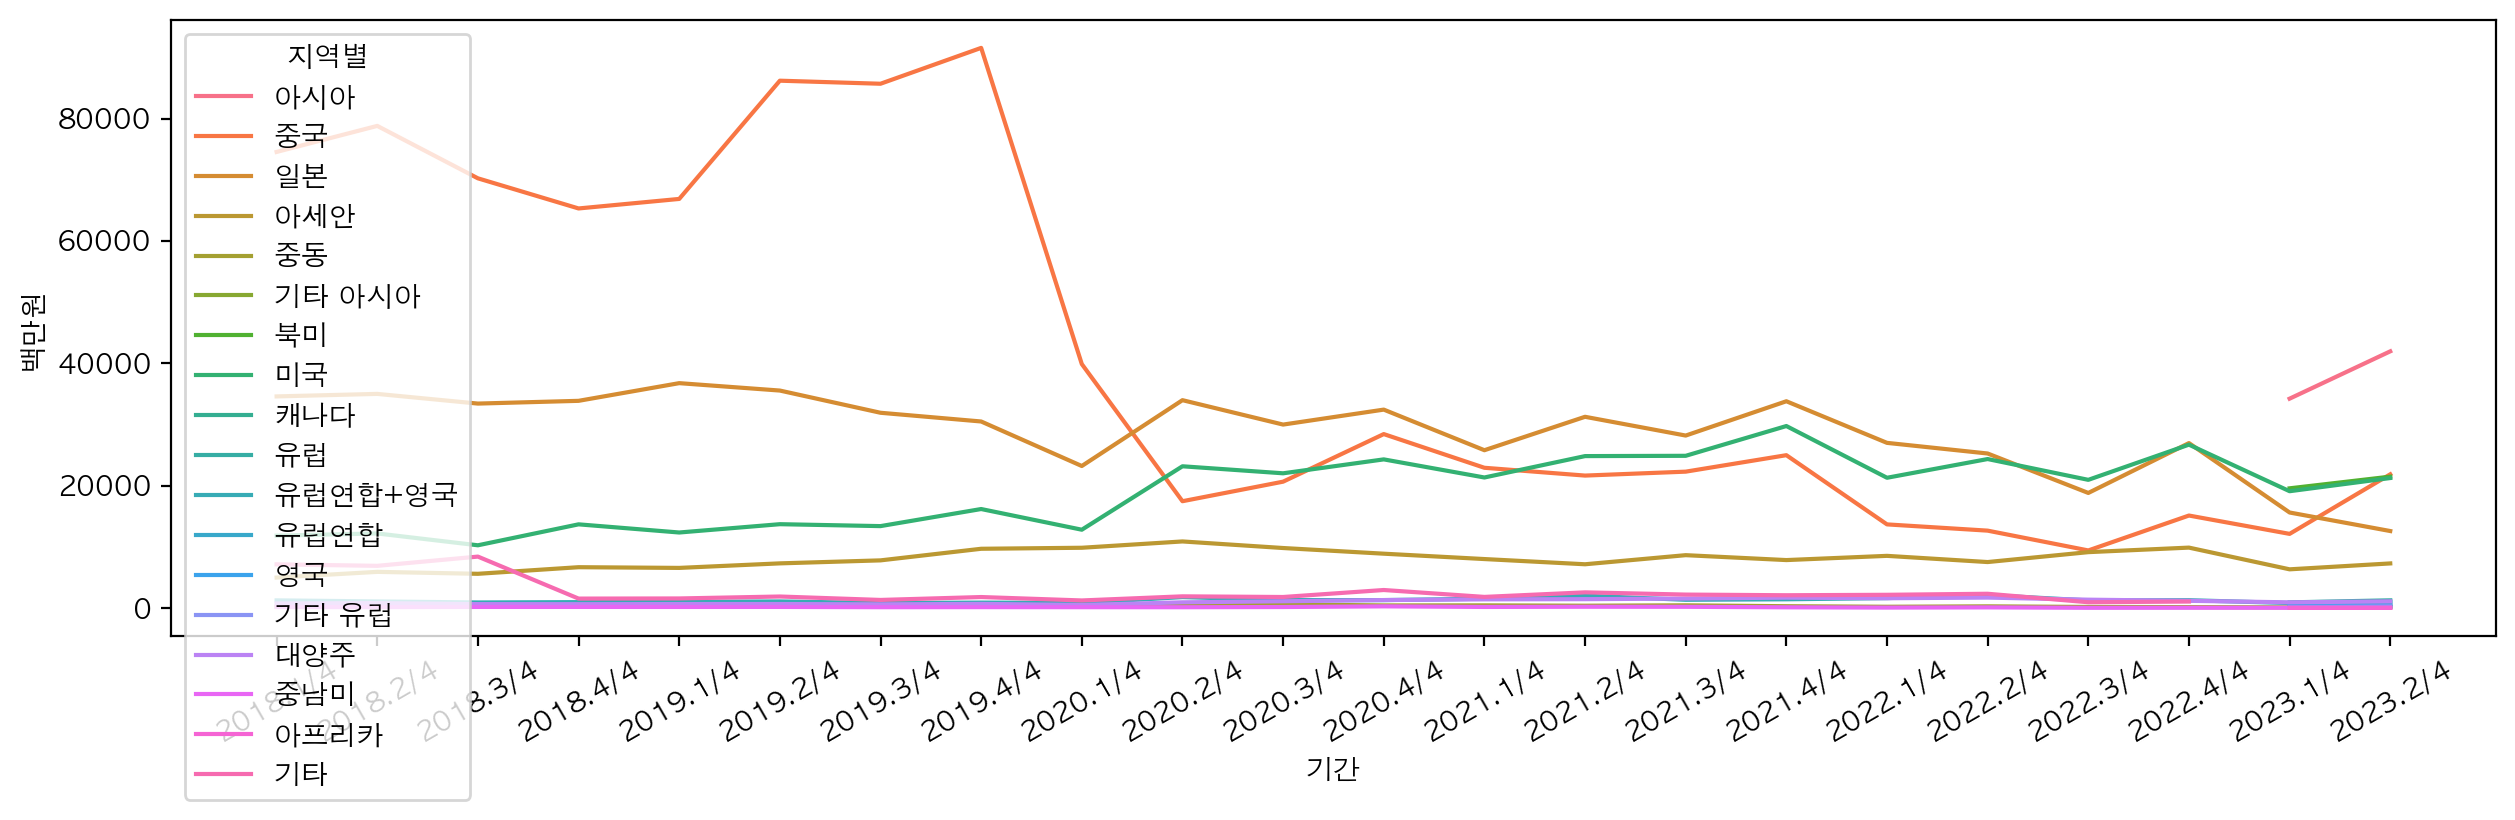

In [55]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="지역별")

<Axes: xlabel='기간', ylabel='백만원'>

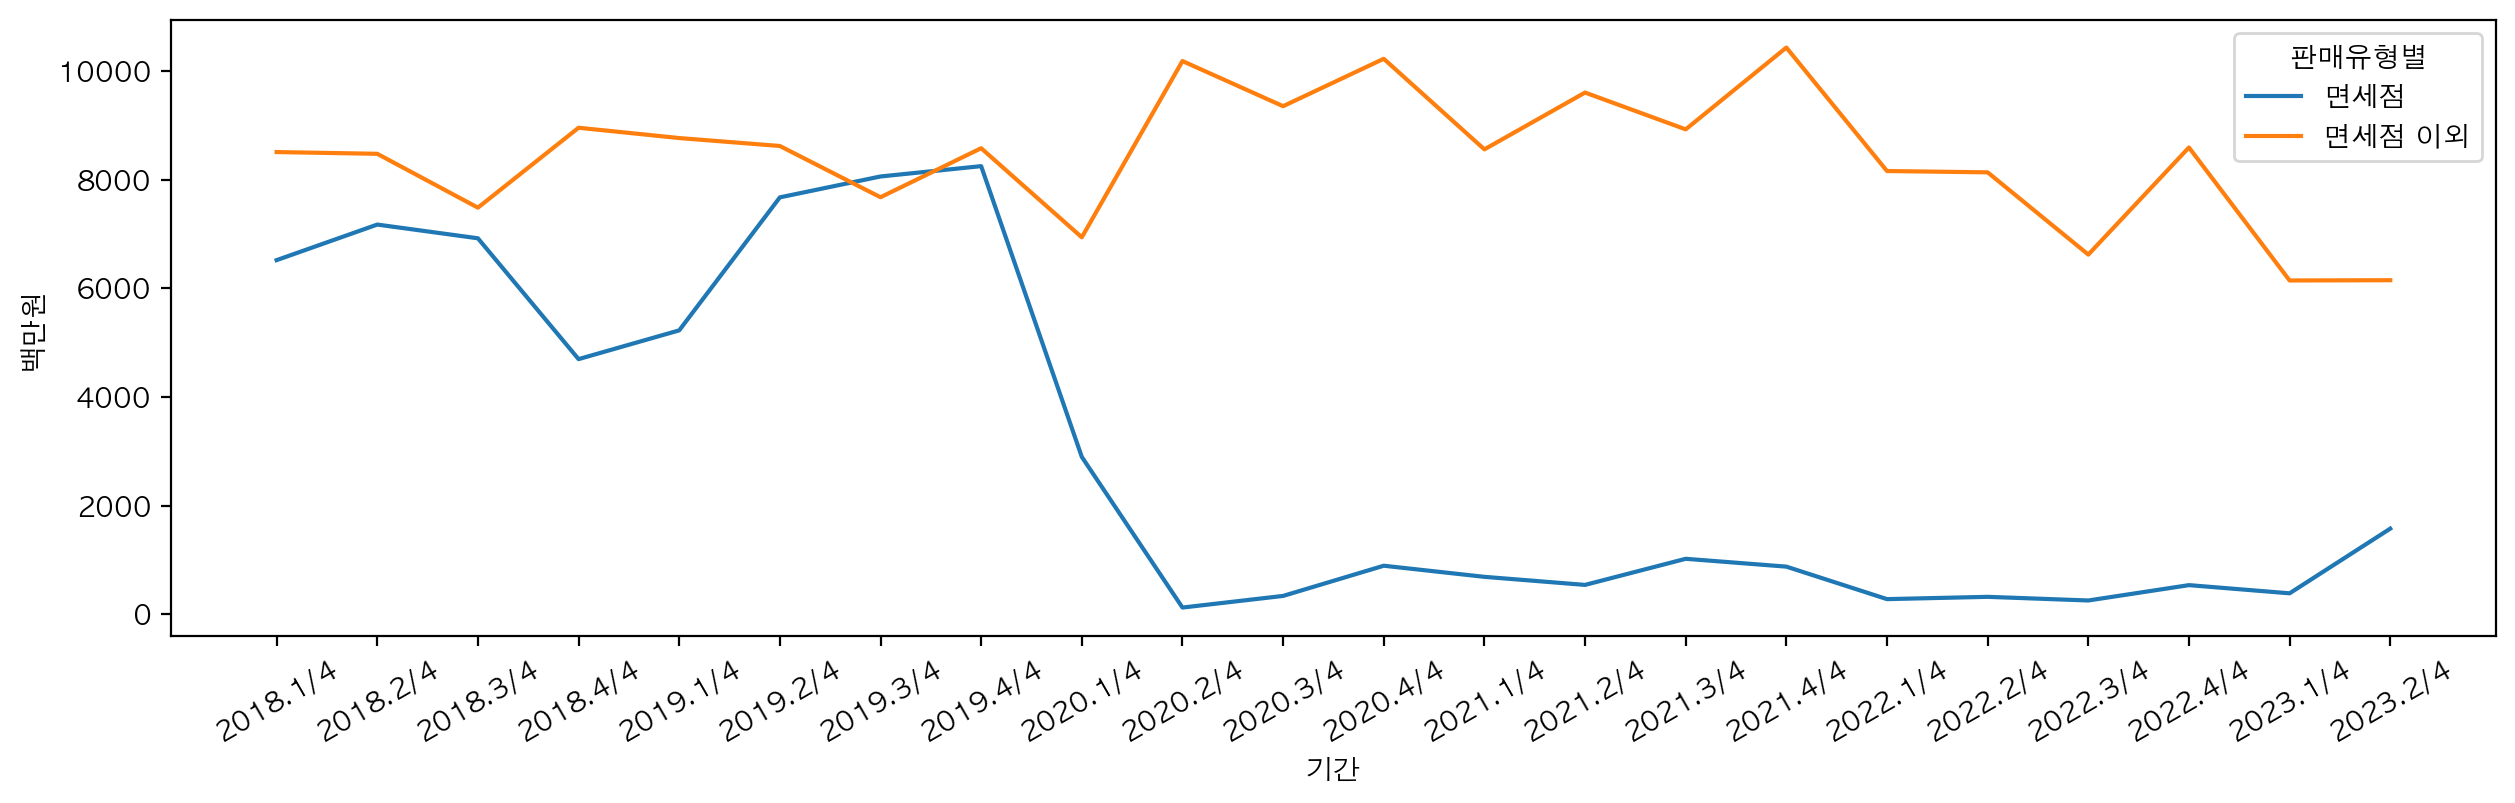

In [58]:
df_fashion2 = df[(df["상품군별"] == "의류 및 패션 관련 상품") & (df["판매유형별"] != "계")].copy()

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue ="판매유형별", ci=None)

## Pivot Table and Heat Map

In [59]:
df_fashion.pivot_table(index="지역별", columns="연도", values="백만원")

연도,2018,2019,2020,2021,2022,2023
지역별,,,,,,
기타,5975.25,1618.75,1951.75,2144.50,1602.25,NaN
기타 아시아,NaN,NaN,NaN,NaN,NaN,154.0
기타 유럽,NaN,NaN,NaN,NaN,NaN,181.5
대양주,681.25,622.25,937.25,1505.75,1439.75,988.5
미국,11968.75,13884.00,20551.75,25180.25,23305.50,20151.0
북미,NaN,NaN,NaN,NaN,NaN,20501.0
아세안,5767.00,7811.75,9834.75,7887.25,8741.50,6786.5
아시아,NaN,NaN,NaN,NaN,NaN,38071.5
아프리카,NaN,NaN,NaN,NaN,NaN,0.5


In [61]:
result = df_fashion.pivot_table(index="지역별", columns="연도", values="백만원", aggfunc="sum")
result

연도,2018,2019,2020,2021,2022,2023
지역별,,,,,,
기타,23901.0,6475.0,7807.0,8578.0,6409.0,0.0
기타 아시아,0.0,0.0,0.0,0.0,0.0,308.0
기타 유럽,0.0,0.0,0.0,0.0,0.0,363.0
대양주,2725.0,2489.0,3749.0,6023.0,5759.0,1977.0
미국,47875.0,55536.0,82207.0,100721.0,93222.0,40302.0
북미,0.0,0.0,0.0,0.0,0.0,41002.0
아세안,23068.0,31247.0,39339.0,31549.0,34966.0,13573.0
아시아,0.0,0.0,0.0,0.0,0.0,76143.0
아프리카,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='연도', ylabel='지역별'>

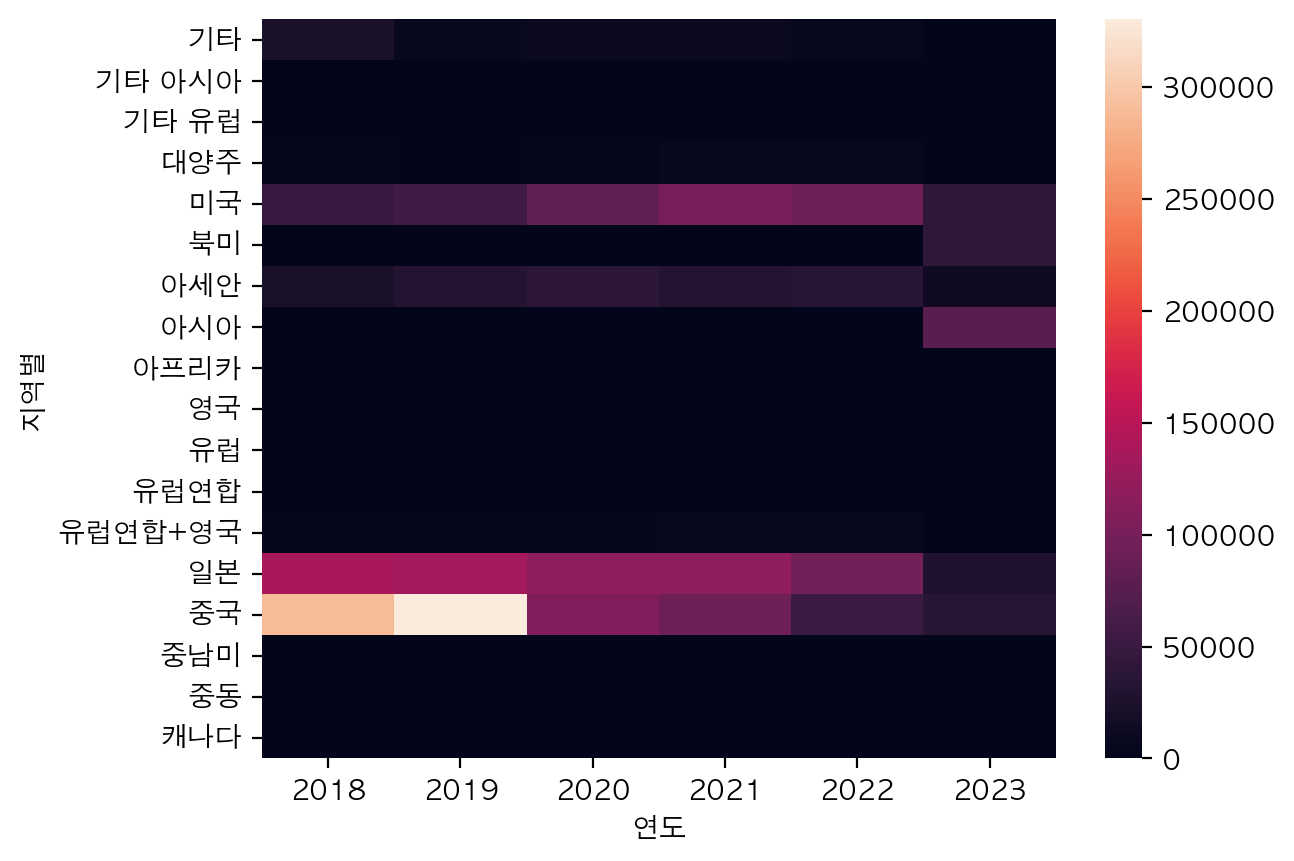

In [62]:
sns.heatmap(result)